## AJUSTE DOIDÃO 2.0 4X4 TURBO DIESEL FULL POWER SAYAJIN

Oi meninxs, no video de hoje vamos ver como fazer o Python realizar os ajustes de função logística nos dados de categorização de faces. Para isso, faremos uma lista de pré-requisitos:

-Um computador

-Muita força de vontade :)

-Python 3 instalado no seu computador

O jeito mais facil de se obter o python 3 é baixando o anaconda (https://www.anaconda.com/), ele vem com um compilador para varias linguagens de programação. Além disso, ter os dados que você quer ajustar e plotar em uma planilha do tipo .csv ajuda bastante.

Vamos começar! Vocês estão prontas crianças? (Porfavor digam: estamos capitão!)
Abrindo o python, antes de escrever o código precisamos importar para ele os pacotes que usaremos, pense nesses pacotes como pequenos trechos de uma receita de comida que ja estão prontos para você usar. Por exemplo, quando você vai fazer um molho, normalmente você usa um extrato de tomate certo? Se você fosse fazer tudo do 0, seria necessário criar seu próprio extrato de tomate, mas geralmente as pessoas compram algum pronto no mercado. O extrato de tomate pronto que você compra é como se fosse um dos pacotes que você usa para o seu programa em Python.

Pois bem, queremos fazer a seguinte coisa: Primeiro, precisamos ler os dados do nosso arquivo, depois o programa deve plotar eles em um gráfico. Por ultimo, fazer um ajuste logístico com esses dados e nos retornar os valores do ajuste e um gráfico final.

3 etapas, para cada uma delas, há pacotes que fazem isso. Primeiro, para escrever qualquer tipo de função matemática, o pacote NUMPY é um compilado das mais famosas funções matemáticas, como a exponencial, seno, cosseno, raiz quadrada e coisas do tipo. Para ler arquivos em formato .csv, ou .txt, ou algo do gênero, existe o pacote PANDAS que faz isso. Para fazer gráficos, o pacote mais completo e comum do python é o MATPLOTLIB.PYPLOT. Porfim, para fazer ajustes, usamos o SCIPY.OPTIMIZE e o SKLEARN.METRICS. O SCIPY.OPTIMIZE tem, dentro dele vários métodos de ajustes diferentes, usaremos o CURVE_FIT, que ajusta curvas e funções utilizando o algoritmo dos minimos quadrados não-linear (Para poupa-los da ira sem fim da matemática computacional, não irei entrar em detalhes de como o algoritmo funciona). O SKLEARN.METRICS também tem várias métricas para avaliar a qualidade de ajustes, usaremos aqui o R2_SCORE que nos dá o valor de $\chi^2$ do ajuste.

Aqui embaixo está o código que importa esses pacotes

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

Vamos à execução do programa em si agora. Prepare-se para uma aventura algoritmica lendária que será eternamente lembrada pelos Deuses de Asgard!

Primeiro, vamos importar nosso arquivo com o PANDAS, que está sendo apelidado de ''pd'' no programa. Para isso, precisamos saber aonde o arquivo está do computador ou da internet. Se o arquivo estiver no computador, precisamos do endereço por exemplo /home/pedroc/Documentos/pedro/Coronavirus/Dadosdoidoesdobrasil.csv. Nesse caso, eu fiz upload de um txt simples com tudo o que iremo usar nesse tutorial aqui no Github, então precisamos do endereço web (famoso link) da pasta. O comando que utiliza o pacote PANDAS para ler um arquivo é ''read_csv(endereço do arquivo)''. O comando ''head(x)'' mostra os primeiros x itens do arquivo na tela para você conferir. Aqui, lembrem se que o Python é estranho, e ao invés de começar contagem que nem nós humanos (1,2,3...), ele começa do 0, isto significa que se você quer ver 10 itens, você deve mandar ele ler até o 9, ja que o 0 é considerado o 1º.

In [41]:
url = 'https://raw.githubusercontent.com/PedroHPCintra/ValedaEstranhezaZikadaGalera/master/MulheresFacesmas.txt'
Dados = pd.read_csv(url)
Dados.head(5)

url2 = 'https://raw.githubusercontent.com/PedroHPCintra/ValedaEstranhezaZikadaGalera/master/ErrMulheresFacesmas.txt'
DadosErr = pd.read_csv(url2)
DadosErr.head(5)

,Erro Mulheres Faces Masculinas
0,0.012881
1,0.012881
2,0.017554
3,0.049171
4,0.068508


Maravilha! Até aqui tudo bem, vamos agora pedir para ele plotar nossos dados. Aqui iremos usar o pacote MATPLOTLIB (apelidado carinhosamente de plt) para realizar a plotagem. Vamos pensar em nosso plot, o eixo X é a dimensão da semelhança humana, que podemos organizar apenas como sendo os valores de 1 até 10 com o comando ''linspace(inicio, fim, quantidade de pontos entre o inicio e o fim)'' do pacote NUMPY. o eixo Y é nosso arquivo ja apelidado MfacesH. O comando ''plot(eixoX, eixoY, 'k.')'', o comando ''title(titulo do grafico)'' coloca um titulo no gráfico, o comando ''xlabel(nome)'' ou ''ylabel(nome)'' atribui um nome ao eixo X ou Y e por fim o comando ''errorbar(eixoX, eixoY, fmt = 'none', yerr = nome do arquivo onde os erros estão, capsize = tamanho da cabeça da barrinha de erro, color = cor da sua preferencia)'' define as barras de erro do nosso gráfico.

Text(0, 0.5, 'Categorização como real')

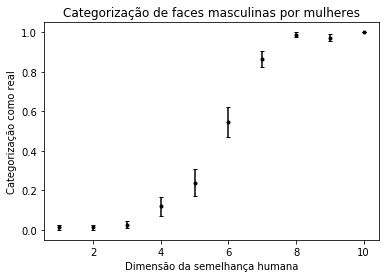

In [46]:
MfaceH = Dados.values.ravel()
Erro = DadosErr.values.ravel()
DimH = np.linspace(1, 10, 10)
plt.title('Categorização de faces masculinas por mulheres')
plt.plot(DimH, MfaceH, 'k.')
plt.errorbar(DimH, MfaceH, fmt = 'none', yerr = Erro, capsize = 2, color = 'black')
plt.xlabel('Dimensão da semelhança humana')
plt.ylabel('Categorização como real')

Agora que ja plotamos nossos queridissimos e amados dados, vamos cuidar do ajuste! Usaremos o curve_fit e o r2_score para isso. Primeiro precisamos definir a função logística que será ajustada. Uma função logística tem a expressão

$$f(x) = \frac{A}{1 + e^{-B(x-C)}},$$

onde os parâmetros $A$, $B$, $C$ definem o formato da nossa curva logística e serão ajustados aos dados. O parâmetro $A$ nos diz a altura máxima que a curva atinge, o parâmetro $B$ nos da a inclinação da subida; se ela é muito íngrime ou mais suave, e por fim o parâmetro $C$ nos da o ponto médio da curva, ou seja, o momento em que a crescida está exatamente na metade. Muitas coisas no mundo se comportam como funções logísticas, por motivos diferentes é claro, por exemplo a curva cumulativa de pessoas infectadas pelo vírus SARS-CoV-2 agora na pandemia que vivemos, ou a categorização de faces em reais ou artificiais dentro da dimensão da semelhança humana.

Devemos escrever essa função no Python com auxilio do NUMPY. Logo após usamos o pacote curve_fit para determinar a nossa função e nossos dados, e ele faz o ajuste sozinho, salvando no computador o valor e o erro dos parâmetros encontrados. Nós podemos usar o comando ''print'' para mandar ele nos mostrar esses valores e o comando ''r2_score(dados, ajuste)'' para printar o valor do $\chi^2$ do ajuste.

In [58]:
def sig(x, a, b, c):
    return a/(1+np.exp(-b*(x - c)))

c, cov = curve_fit(sig, DimH, MfaceH, bounds = ((0,0,0),(1, 10, 10)))

sigopt = sig(DimH, c[0], c[1], c[2])

print('R^2:', r2_score(MfaceH, sigopt))
print('A:', c[0], '+/-', cov[0,0]**0.5)
print('B:', c[1], '+/-', cov[1,1]**0.5)
print('C:', c[2], '+/-', cov[2,2]**0.5)

R^2: 0.9973513078856328
A: 0.9999999999999999 +/- 0.01768495623768239
B: 1.3937723941906188 +/- 0.10730573348521089
C: 5.794400891824104 +/- 0.06550700029793498


Uhul! VITÓRIA PERANTE À INJUSTIÇA! Por ultimo, vamos plotar essa curva, junto aos nossos dados. Nosso parâmetro $A$ está gravado no conjunto de valores c do computador (chamado de vetor), mais especificamente, no primeiro valor desse vetor, o c[0] (lembre que a contagem no Python começa em 0). O parâmetro $B$ está no c[1] e assim por diante. Para plotar nossa função de forma bem smoooooooth, vamos adicionar vários e vários pontos no intervalo de 1 até 10 no eixo X para que a função não fique feia.

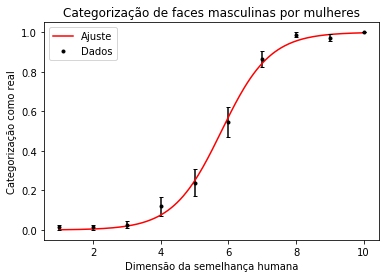

In [59]:
x2 = np.linspace(1, 10, 200)
plt.title('Categorização de faces masculinas por mulheres')
plt.plot(x2, sig(x2, c[0], c[1], c[2]), color = 'red', label = 'Ajuste')
plt.plot(DimH, MfaceH, 'k.', label = 'Dados')
plt.errorbar(DimH, MfaceH, fmt = 'none', yerr = Erro, capsize = 2, color = 'black')
plt.xlabel('Dimensão da semelhança humana')
plt.ylabel('Categorização como real')
plt.legend(loc = 'best')

Por ultimo, vamos deixar nosso gráfico mais bonito, incluindo a margem de erro do ajuste nele. Para isso, usamos o comando ''fill_between'' do MATPLOTLIB que irá criar uma região preenchida com a cor que quisermos no intervalo que quisermos, só precisamos ajustar esse intervalo para as nossas margens de erro.

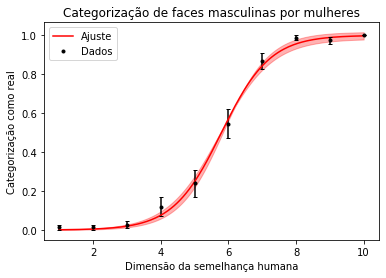

In [61]:
plt.title('Categorização de faces masculinas por mulheres')
plt.plot(x2, sig(x2, c[0], c[1], c[2]), color = 'red', label = 'Ajuste')
plt.fill_between(x2, sig(x2, c[0]-cov[0,0]**0.5, c[1]-cov[1,1]**0.5, c[2]-cov[2,2]**0.5), 
                 sig(x2, c[0]+cov[0,0]**0.5, c[1]+cov[1,1]**0.5, c[2]+cov[2,2]**0.5), color = 'red', alpha = 0.3)
plt.plot(DimH, MfaceH, 'k.', label = 'Dados')
plt.errorbar(DimH, MfaceH, fmt = 'none', yerr = Erro, capsize = 2, color = 'black')
plt.xlabel('Dimensão da semelhança humana')
plt.ylabel('Categorização como real')
plt.legend(loc = 'best')

PERFECTO! A vitória reina novamente e nossos dados estão analisados e plotados! O processo para ajustar qualquer outro dado é análogo, precisamos importar e ler os dados de algum lugar, ajustar uma função a eles e obter os parâmetros do ajuste.

## Fim do vídeo de hoje meninxs